# Predicting The Sale Price of bulldozers using machine learning

## 1. Problem definition

> How well can we predict the future sale price of a bulldozer, given its characteristics
its characteristics and previous examples of how much similar bulldozers have been sold for.

## 2. Data

`LINK` : https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview

Overview : 

*The data for this competition is split into three parts :*

* Train.csv is the training set, which contains data through the end of 2011.

* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You   make predictions on this set throughout the majority of the competition. Your score on this      set is used to create the public leaderboard.

* Test.csv is the test set, which won't be released until the last week of the competition. It     contains data from May 1, 2012 - November 2012. Your score on the test set determines your       final rank for the competition

## 3. Evaluation

>The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

> Since RMSLE is a measure of ' ERROR ' Our goal is to get the least possible value for RMSLE

`LINK` : www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

## 4. Features

Kaggle has provided a data dictionary : https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing


| Variable Name | Description  | Variable Type |
|------|-----|-----|
| SalesID   | unique identifier of a particular sale of a machine at auction  | Independent  variable |
| MachineID  | identifier for a particular machine; machines may have multiple sales  | Independent  variable |
| ModelID | identifier for a unique machine model (i.e. fiModelDesc) | Independent  variable |
| datasource  | source of the sale record; some sources are more diligent about reporting attributes of the machine than others. Note that a particular datasource may report on multiple auctioneerIDs. | Independent  variable |
| auctioneerID  | identifier of a particular auctioneer, i.e. company that sold the machine at auction. Not the same as datasource.  | Independent  variable |
| YearMade  | year of manufacturer of the Machine  | Independent  variable |
| MachineHoursCurrentMeter | current usage of the machine in hours at time of sale (saledate); null or 0 means no hours have been reported for that sale | Independent  variable |
| UsageBand | value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel; e.g. 'Low' means this machine has fewer hours given its lifespan relative to the average of fiBaseModel. | Independent  variable |
| Saledate   | time of sale | Independent  variable |
| fiModelDesc  | Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDesc & fiModelSeries & fiModelDescriptor  | Independent  variable |
| State | US State in which sale occurred | Independent  variable |
| Drive_System | machine configuration; typically describes whether 2 or 4 wheel drive  | Independent  variable |
| Enclosure  | machine configuration - does the machine have an enclosed cab or not | Independent  variable |
| Forks  | machine configuration - attachment used for lifting  | Independent  variable |
| Pad_Type | machine configuration - type of treads a crawler machine uses | Independent  variable |
| Ride_Control  | machine configuration - optional feature on loaders to make the ride smoother | Independent  variable |
| Transmission | machine configuration - describes type of transmission; typically automatic or manual | Independent  variable |
| ... | ... | ... |
| SalePrice | cost of sale in USD | Target/dependent variable | 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [34]:
# Import train and valid sets
df = pd.read_csv("D:\Projects\Bulldozer Price Prediction\Data\TrainAndValid.csv",
                low_memory=False)
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\My\AppData\Local\Temp\ipykernel_2836\3188215896.py:2: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("D:\Projects\Bulldozer Price Prediction\Data\TrainAndValid.csv",


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [36]:
df.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

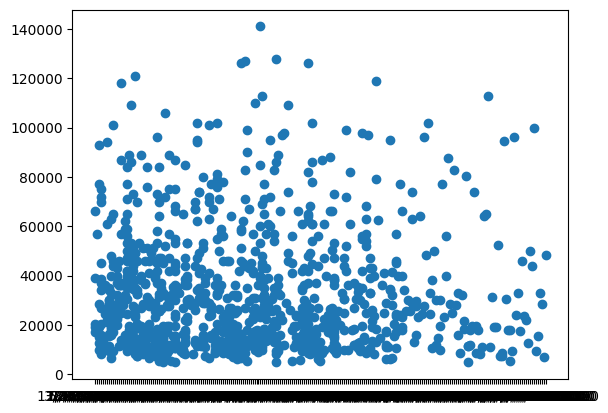

In [37]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

In [38]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

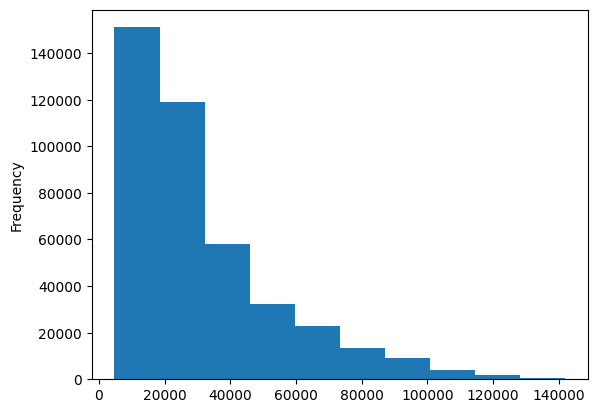

In [39]:
df.SalePrice.plot.hist()
plt.show()

## Parsing dates

When working with time series data. Try your best to get the mostout of time & date component as much as possible

We can do that by telling pandas which of our columns has dates by using the `parse_dates` parameter

In [40]:
# Import data again but this time parse dates
df = pd.read_csv("D:\Projects\Bulldozer Price Prediction\Data\TrainAndValid.csv",
                low_memory=False,
                parse_dates=['saledate'])

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\My\AppData\Local\Temp\ipykernel_2836\1589781514.py:2: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("D:\Projects\Bulldozer Price Prediction\Data\TrainAndValid.csv",


In [41]:
df.saledate.dtype

dtype('<M8[ns]')

In [42]:
print(type(df.saledate))

<class 'pandas.core.series.Series'>


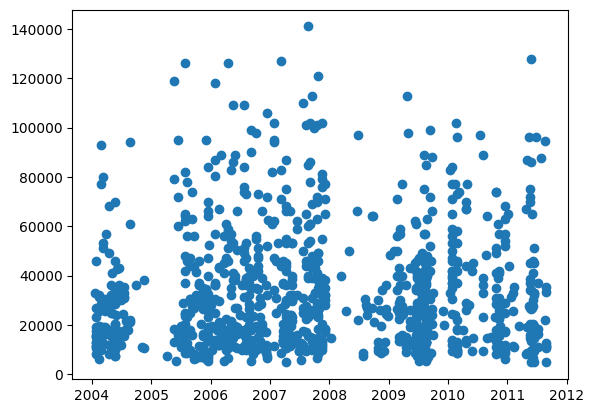

In [43]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df['SalePrice'][:1000])

In [44]:
df.head(
    
)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [46]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate

When working with time series data, it's a good practice to sort it by date

In [47]:
# Sort DataFrame in date order
df = df.sort_values(by=['saledate'], ascending = True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make copy of the original DataFrame

This is done so we can try different things with copied data while keeping the original data safe.

In [48]:
df_tmp = df.copy()

### Add datetime parameters for `saledate` column


In [49]:
df_tmp['SaleYear'] = df_tmp.saledate.dt.year
df_tmp['SaleMonth'] = df_tmp.saledate.dt.month
df_tmp['SaleDay'] = df_tmp.saledate.dt.day
df_tmp['SaleDayOfWeek'] = df_tmp.saledate.dt.dayofweek
df_tmp['SaleDayOFYear'] = df_tmp.saledate.dt.dayofyear

In [50]:

df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [51]:
# Now that we have extracted usefull information from our saledate column we can drop it
df_tmp.drop('saledate', axis=1, inplace=True)

In [52]:
# Check the values of different columns
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

<Axes: xlabel='state'>

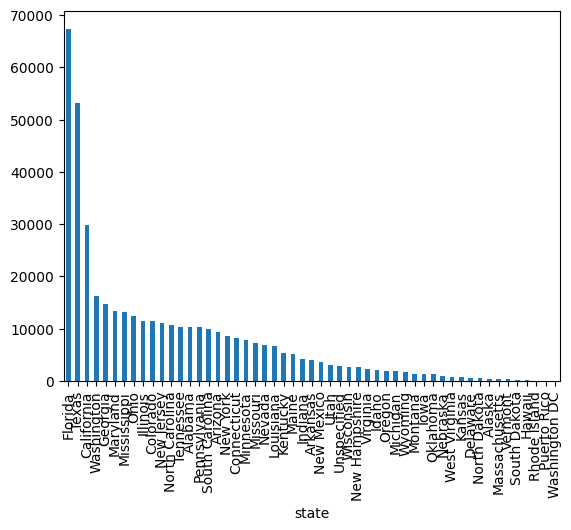

In [53]:
df_tmp.state.value_counts().plot(kind='bar')

### After getting information from the `saledate` column we are now left with `Null values` and `Object dtype` problems

In [54]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [55]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

### Convert string to categories

One way we can turn all of our data into numbers is by converting them into pandas categories.


In [56]:
pd.api.types.is_object_dtype(df_tmp['UsageBand'])

True

_We know that string (str) is 'Object' or 'O' datatype_

In [57]:
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [58]:
# This will turn all of the strng value into category values 
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [59]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [60]:
df_tmp.state.cat.codes


205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Now What Pandas has done is that. It assigned a numeric value to every value of every category (The object dtype columns that we converted by using `astype('category')`) AND now we can access the numeric values without doing all the hassle of getting dummies or OneHotEncoding

# But

We still have null values

In [61]:
# Check missing data
print((df_tmp.isnull().sum()/len(df_tmp))*100)

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

### Save preprocessed data 


In [62]:
# Export current temporary DataFrame
df_tmp.to_csv("D:\Projects\Bulldozer Price Prediction\Data\Preprocessed_Temporary_Training.csv", 
             index=False)


<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\My\AppData\Local\Temp\ipykernel_2836\1162203763.py:2: SyntaxWarning: invalid escape sequence '\P'
  df_tmp.to_csv("D:\Projects\Bulldozer Price Prediction\Data\Preprocessed_Temporary_Training.csv",


In [63]:
# Import Preprocessed data
df_tmp = pd.read_csv("D:\Projects\Bulldozer Price Prediction\Data\Preprocessed_Temporary_Training.csv",
             low_memory=False)
df_tmp.head(1)

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\My\AppData\Local\Temp\ipykernel_2836\700774216.py:2: SyntaxWarning: invalid escape sequence '\P'
  df_tmp = pd.read_csv("D:\Projects\Bulldozer Price Prediction\Data\Preprocessed_Temporary_Training.csv",


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleYear,SaleMonth,SaleDay,SaleDayOfWeek,SaleDayOFYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17


In [64]:
df_tmp.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Fill missing values

### Fill numerical missing values first

In [65]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
SaleYear
SaleMonth
SaleDay
SaleDayOfWeek
SaleDayOFYear


In [66]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [67]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            df_tmp[label + "_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [68]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Great!!! Because there was no output means that there aren't any null values in the numeric categorical features

In [69]:
# Check to see how many examples were missing
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [70]:
# Now we are left with null values from our categorical features
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and turning Categorical variables into numbers


In [71]:
# check for columns which aren't numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [72]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column to indicate whether sample had missing value
        df_tmp[label + "_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes + 1

In [73]:
pd.Categorical(df_tmp['state']).codes+1


array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [74]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [75]:
df_tmp.columns.T

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=103)

In [76]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [77]:
df_tmp.isnull().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [78]:
if (df_tmp.isnull().sum() >= 1).any():
    print("There are still null values !!!!!")
else:
    print('All good')

All good


In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score, root_mean_squared_error


In [80]:
%%time
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)
model.fit(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

CPU times: total: 43min 38s
Wall time: 6min 52s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [81]:
model.score(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

0.9875468079970562

**Question :** Why isn't the above metric reliable ?

**Answer :** Because it hasn't been validated and It hasn't been tested on unseen data...And It hasn't been cross-validated.....And we haven't tuned it.

That's the reason some people think that machine learning is hard Because even after doing all that we still have alot that is left to do

### Splitting data into train/validation sets

In [82]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [83]:
df_tmp.SaleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: SaleYear, Length: 412698, dtype: int64

In [84]:
df_tmp.SaleYear.value_counts()

SaleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [85]:
# Split data into train and valid
df_val = df_tmp[df_tmp.SaleYear == 2012]
df_train = df_tmp[df_tmp.SaleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [86]:
# Split data into X and y
X_train, y_train = df_train.drop(['SalePrice'], axis=1), df_train['SalePrice']
X_valid, y_valid = df_val.drop(['SalePrice'], axis=1), df_val['SalePrice']

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [87]:
# Evaluation function (The competition wants RMSLE(Root Mean Square Log Error))
from sklearn.metrics import root_mean_squared_log_error

In [88]:
# Create a function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE ": mean_absolute_error(y_train, train_preds),
              "Validation MAE ": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE ": root_mean_squared_log_error(y_train, train_preds),
              "Validation RMSLE ": root_mean_squared_log_error(y_valid, val_preds),
              "Training r2 ": r2_score(y_train, train_preds),
              "Valid r2 ": r2_score(y_valid, val_preds)
             }

    return scores

### Testing the model on a subset ( to tune the hyperparameters )

In [89]:
# This will take alot of time when experimenting and TIME is very precious. So 
# We'll reduce the amount of data that we have



# %%time 
# model = RandomForestRegressor(n_jobs = -1,
#                              random_state = 42)

# model.fit(X_train, y_train)

In [90]:
# Change max_samples value

# `max_samples` is how much data each tree gets. In this case each tree is getting 10k samples

model = RandomForestRegressor(n_jobs = -1,
                             random_state = 42,
                             max_samples=10000)

model.fit(X_train, y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [91]:
ss = show_scores(model)

In [92]:
for key, value in ss.items():
    print(f"{key} : {value}")

Training MAE  : 5561.2988092240585
Validation MAE  : 7177.26365505919
Training RMSLE  : 0.257745378256977
Validation RMSLE  : 0.29362638671089003
Training r2  : 0.8606658995199189
Valid r2  : 0.8320374995090507


### Hyperparameter tuning with RandomizedSearchCV


In [93]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameter
rf_grid = {"n_estimators" : np.arange(10, 100, 10),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2),
          "max_features": [0.5, 1, "sqrt", "auto"],
          "max_samples": [10000]
          }

# Instantiate the RandomizedSearchCV 
rf_rs_CV = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42),
                              param_distributions=rf_grid,
                              n_jobs=-1,
                              cv=5,
                              random_state=42,
                              n_iter=5,
                              verbose=True)

rf_rs_CV.fit(X_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: total: 14.6 s
Wall time: 57.9 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=42, verbose=True)

In [94]:
# Best parameters
rf_rs_CV.best_params_

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 1,
 'max_depth': None}

In [95]:
# Evaluation 
show_scores(rf_rs_CV)

{'Training MAE ': 8891.655193695899,
 'Validation MAE ': 11313.549827603978,
 'Training RMSLE ': 0.39237058829152377,
 'Validation RMSLE ': 0.4484052255971633,
 'Training r2 ': 0.6825547447927643,
 'Valid r2 ': 0.6361784117343763}

## Train a model with the best hyperparameters

**Note**: These were found after 100 iterations of RandomizedSearchCV

In [96]:
%%time

ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)

# Fit the model
ideal_model.fit(X_train, y_train)

CPU times: total: 9min 48s
Wall time: 1min 29s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [97]:
# Scores of model with ideal hyperparameters trained on Full DATA
show_scores(ideal_model)

{'Training MAE ': 2953.8161137163484,
 'Validation MAE ': 5951.247761444453,
 'Training RMSLE ': 0.14469006962371858,
 'Validation RMSLE ': 0.24524163989538328,
 'Training r2 ': 0.9588145522577225,
 'Valid r2 ': 0.8818019502450094}

In [98]:
# Scores of rf_rs_CV model (Trained only on 10,000 samples)
show_scores(rf_rs_CV)

{'Training MAE ': 8891.655193695899,
 'Validation MAE ': 11313.549827603978,
 'Training RMSLE ': 0.39237058829152377,
 'Validation RMSLE ': 0.4484052255971633,
 'Training r2 ': 0.6825547447927643,
 'Valid r2 ': 0.6361784117343763}

## Make predictions on test data

In [99]:
df_test = pd.read_csv("D:\Projects\Bulldozer Price Prediction\Data\Test.csv",
                      low_memory=False,
                      parse_dates=['saledate'])
df_test.head()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\My\AppData\Local\Temp\ipykernel_2836\68915598.py:1: SyntaxWarning: invalid escape sequence '\P'
  df_test = pd.read_csv("D:\Projects\Bulldozer Price Prediction\Data\Test.csv",


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [100]:
df_test.isnull().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [101]:
print(df_test.dtypes == 'object')

SalesID                     False
MachineID                   False
ModelID                     False
datasource                  False
auctioneerID                False
YearMade                    False
MachineHoursCurrentMeter    False
UsageBand                    True
saledate                    False
fiModelDesc                  True
fiBaseModel                  True
fiSecondaryDesc              True
fiModelSeries                True
fiModelDescriptor            True
ProductSize                  True
fiProductClassDesc           True
state                        True
ProductGroup                 True
ProductGroupDesc             True
Drive_System                 True
Enclosure                    True
Forks                        True
Pad_Type                     True
Ride_Control                 True
Stick                        True
Transmission                 True
Turbocharged                 True
Blade_Extension              True
Blade_Width                  True
Enclosure_Type

In [102]:
len(df_test.columns)

52

In [103]:
len(X_train.columns)

102

In [104]:
df_test.saledate

0       2012-05-03
1       2012-05-10
2       2012-05-10
3       2012-05-10
4       2012-05-10
           ...    
12452   2012-10-24
12453   2012-10-24
12454   2012-10-24
12455   2012-10-24
12456   2012-09-19
Name: saledate, Length: 12457, dtype: datetime64[ns]

### Preprocessing the test data set just like we did with the training dataset

In [105]:
def preprocess_data(df):
    df['SaleYear'] = df.saledate.dt.year
    df['SaleMonth'] = df.saledate.dt.month
    df['SaleDay'] = df.saledate.dt.day
    df['SaleDayOfWeek'] = df.saledate.dt.dayofweek
    df['SaleDayOFYear'] = df.saledate.dt.dayofyear

    df = df.drop(['saledate'], axis = 1)

    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #Add a binaary column which tells us if the data was missing
                df[label + '_is_missing'] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())

        if not pd.api.types.is_numeric_dtype(content):
            df[label + "_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes+1

    return df
                

In [106]:
preprocessed_df_test = preprocess_data(df_test)
preprocessed_df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [107]:
preprocessed_df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=101)

In [108]:
len(preprocessed_df_test.columns)

101

In [109]:
len(X_train.auctioneerID_is_missing)

401125

In [110]:
# I tried to Train a model with the preprocessed test df. 
# But It gave an error. And Now we know that the length of columns are different
set(X_train.columns) - set(preprocessed_df_test.columns)

{'auctioneerID_is_missing'}

In [111]:
preprocessed_df_test['auctioneerID_is_missing'] = False
preprocessed_df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,True,True,True,True,True,False
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,True,True,True,True,True,False
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,True,True,True,True,True,False
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,True,True,True,True,True,False


In [112]:
#ideal_model.predict(preprocessed_df_test)

### The above code gives an error that says : `The feature names should match those that were passed during fit. Feature names must be in the same order as they were in fit.`. To fix this we will use the following code

In [113]:
print(X_train.columns.get_loc('auctioneerID'))


4


In [114]:
df_test = preprocessed_df_test[X_train.columns]  # Reorder test set columns


In [115]:
test_preds = ideal_model.predict(df_test)

In [116]:
len(test_preds)

12457

In [117]:
test_preds

array([17030.00927386, 14355.53565165, 46623.08774286, ...,
       11964.85073347, 16496.71079281, 27119.99044029])

# Amazing now that we have made predictions. It's time to put it in a kaggle format : www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation


In [118]:
# Format predictions
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds.head()

,SalesID,SalesPrice
0,1227829,17030.009274
1,1227844,14355.535652
2,1227847,46623.087743
3,1227848,71680.261335
4,1227863,61762.999424


In [119]:
# Exporting
df_preds.to_csv("D:\Projects\Bulldozer Price Prediction\Data\predictions.csv")

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\My\AppData\Local\Temp\ipykernel_2836\2125738738.py:2: SyntaxWarning: invalid escape sequence '\P'
  df_preds.to_csv("D:\Projects\Bulldozer Price Prediction\Data\predictions.csv")


# Now Time to check what is the Feature Importance of this project

Figuring out which attribute contributed most towards the predicting the **Target Variable**(SalePrice)

In [120]:
# Find feature importance of our best model
len(ideal_model.feature_importances_)

102

In [121]:
len(X_train.columns)

102

In [122]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances":importances}).sort_values("feature_importances", ascending=False).reset_index(drop=False))
    fig, ax =plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:n])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis()

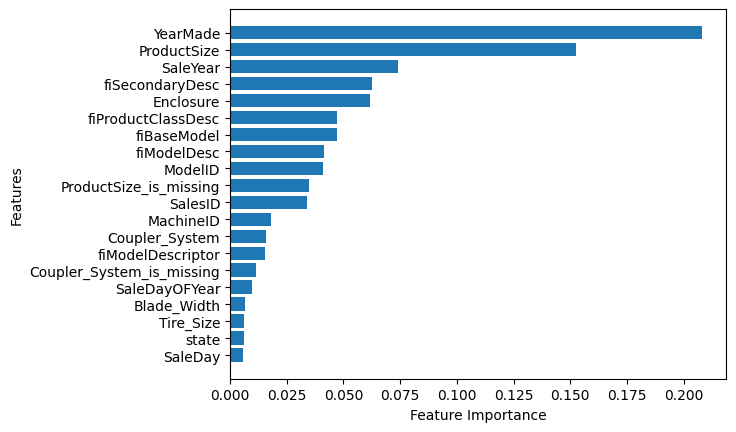

In [123]:
plot_features(X_train.columns, ideal_model.feature_importances_)

__Knowing feature importance helps by:__

* Understanding the Model – Identifies key factors influencing predictions.
* Feature Selection – Removes irrelevant features to improve performance.
* Better Decisions – Provides insights for real-world applications.
* Debugging – Detects data issues or biases.
* Business Insights – Helps in data-driven decision-making